# DSCI 552: Machine Learning for Data Science
## Assignment 8
### Author: Kshitij PAtel

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

#### Imports

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from scipy.special import softmax
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, accuracy_score, precision_recall_fscore_support, pairwise_distances

import warnings
warnings.filterwarnings('ignore')

In [2]:
random_state = 0

### (a) Breast Cancer Wisconsin (Diagnostic) Data Set

In [3]:
data_columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
]
data = pd.read_csv('../data/breast+cancer+wisconsin+diagnostic/wdbc.data', header=None, names=data_columns)


In [4]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data = data.drop(columns=['id'])

In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
data_X = data.drop(columns=['diagnosis'])
data_y = data['diagnosis']
data_y = pd.Series(np.where(data_y.values == 'M', 1, 0), data_y.index, name=data_y.name)

### (b) Monte-Carlo Simulation

#### i. Supervised Learning

In [8]:
def supervised_and_semi_supervised_results(y, y_pred, y_prob, m, data = "test"):
    if data == "test":
        print("Test Results: ")
    else:
        print("Train Results: ")
    
    results = {}

    results["accuracy"] = accuracy_score(y, y_pred)
    results["precision"], results["recall"], results["f1"], _ = precision_recall_fscore_support(y, y_pred, average='binary')
    results["auc"] = roc_auc_score(y, y_pred)

    if m == 0:
        cf_matrix = confusion_matrix(y, y_pred)
        print("Confusion Matrix: ")
        print(cf_matrix)

        fpr, tpr, _ = roc_curve(y, y_prob)

        ns_pred = [0 for _ in range(len(y))]
        ns_fpr, ns_tpr, _ = roc_curve(y, ns_pred)

        plt.plot(ns_fpr, ns_tpr, linestyle="--")
        plt.plot(fpr, tpr, label="SVM")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
        
    print("Accuracy: ", results["accuracy"])
    print("Precision: ", results["precision"])
    print("Recall: ", results["recall"])
    print("F1: ", results["f1"])
    print("AUC: ", results["auc"])

    return results

In [9]:
def supervised(data_X, data_y, m):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=m)

    # scaler = Normalizer(norm='l1')
    # scaled_data = scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(scaled_data, columns=X_train.columns, index=X_train.index)
    # scaled_test_data = scaler.transform(X_test)
    # X_test = pd.DataFrame(scaled_test_data, columns=X_test.columns, index=X_test.index)

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('estimator', LinearSVC(penalty='l1', dual=False, max_iter=200000, random_state=m))
    ])

    param_grid = {
        # 'estimator__C': np.logspace(-4, 4, 9)
        'estimator__C': np.arange(0.1, 10, 0.1) # finer grid search
    }

    grid = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5, 
        n_jobs=-1)
    
    grid.fit(X_train, y_train)

    print("Best Parameters: ", grid.best_params_)

    results = {}

    y_train_pred = grid.predict(X_train)
    y_train_prob = grid.decision_function(X_train)
    results["train"] = supervised_and_semi_supervised_results(y_train, y_train_pred, y_train_prob, m, data = "train")

    y_test_pred = grid.predict(X_test)
    y_test_prob = grid.decision_function(X_test)
    results["test"] = supervised_and_semi_supervised_results(y_test, y_test_pred, y_test_prob, m)

    return results

In [10]:
def monte_carlo(M, data_X, data_y, learning):
    results = []
    for m in range(0, M):
        print("Iteration: ", m + 1)
        result = {}
        if learning == "supervised":
            result = supervised(data_X, data_y, m)
        elif learning == "semi_supervised":
            result = semi_supervised(data_X, data_y, m)
        elif learning == "unsupervised":
            result = unsupervised(data_X, data_y, m)
        elif learning == "spectral":
            result = spectral(data_X, data_y, m)
        print("-----------------------")
        results.append(result)
    return results

Iteration:  1
Best Parameters:  {'estimator__C': 1.8000000000000003}
Train Results: 
Confusion Matrix: 
[[289   1]
 [  4 161]]


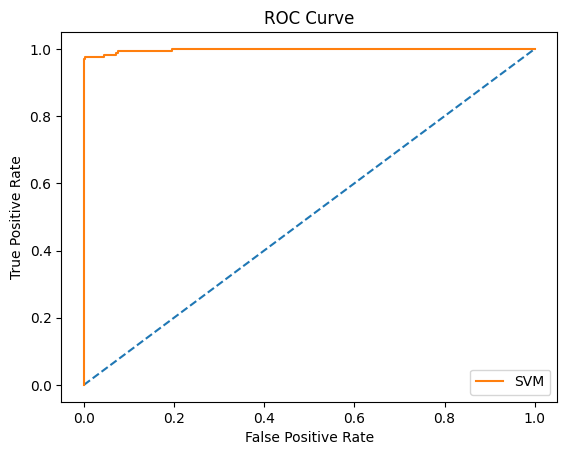

Accuracy:  0.989010989010989
Precision:  0.9938271604938271
Recall:  0.9757575757575757
F1:  0.9847094801223242
AUC:  0.9861546499477533
Test Results: 
Confusion Matrix: 
[[65  2]
 [ 3 44]]


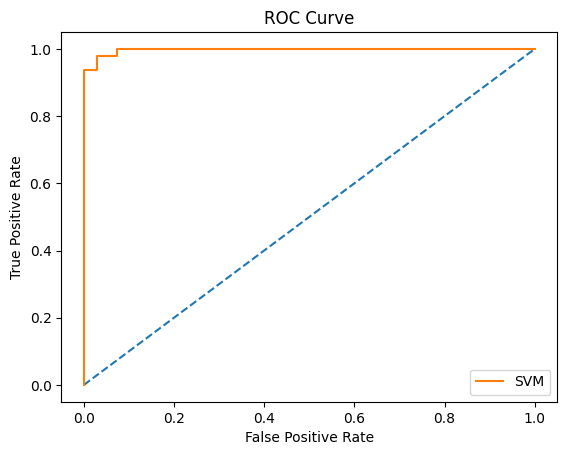

Accuracy:  0.956140350877193
Precision:  0.9565217391304348
Recall:  0.9361702127659575
F1:  0.9462365591397849
AUC:  0.9531597332486503
-----------------------
Iteration:  2
Best Parameters:  {'estimator__C': 1.6}
Train Results: 
Accuracy:  0.9846153846153847
Precision:  0.9880239520958084
Recall:  0.9705882352941176
F1:  0.9792284866468843
AUC:  0.9817853457172343
Test Results: 
Accuracy:  0.9736842105263158
Precision:  1.0
Recall:  0.9285714285714286
F1:  0.962962962962963
AUC:  0.9642857142857143
-----------------------
Iteration:  3
Best Parameters:  {'estimator__C': 0.7000000000000001}
Train Results: 
Accuracy:  0.9846153846153847
Precision:  0.9819277108433735
Recall:  0.9760479041916168
F1:  0.978978978978979
AUC:  0.982815618762475
Test Results: 
Accuracy:  0.9649122807017544
Precision:  0.9767441860465116
Recall:  0.9333333333333333
F1:  0.9545454545454545
AUC:  0.9594202898550726
-----------------------
Iteration:  4
Best Parameters:  {'estimator__C': 2.0}
Train Results: 
Ac

In [11]:
supervised_results = monte_carlo(30, data_X, data_y, learning="supervised")

In [12]:
print("Supervised Learning Train Results: ")
supervised_train_results = []
for result in supervised_results:
    supervised_train_results.append(result["train"])
supervised_train_results = pd.DataFrame(supervised_train_results)
print("Mean Accuracy: ", supervised_train_results["accuracy"].mean())
print("Mean Precision: ", supervised_train_results["precision"].mean())
print("Mean Recall: ", supervised_train_results["recall"].mean())
print("Mean F1: ", supervised_train_results["f1"].mean())
print("Mean AUC: ", supervised_train_results["auc"].mean())

Supervised Learning Train Results: 
Mean Accuracy:  0.9848351648351649
Mean Precision:  0.9899923899246048
Mean Recall:  0.9691243752527392
Mean F1:  0.9793988766672171
Mean AUC:  0.9816414437680895


In [13]:
print("Supervised Learning Test Results: ")
supervised_test_results = []
for result in supervised_results:
    supervised_test_results.append(result["test"])
supervised_test_results = pd.DataFrame(supervised_test_results)
print("Mean Accuracy: ", supervised_test_results["accuracy"].mean())
print("Mean Precision: ", supervised_test_results["precision"].mean())
print("Mean Recall: ", supervised_test_results["recall"].mean())
print("Mean F1: ", supervised_test_results["f1"].mean())
print("Mean AUC: ", supervised_test_results["auc"].mean())

Supervised Learning Test Results: 
Mean Accuracy:  0.9669590643274851
Mean Precision:  0.9710430464817534
Mean Recall:  0.9383993349450044
Mean F1:  0.9537849036128981
Mean AUC:  0.9612976987610414


#### ii. Semi-Supervised Learning / Self-Training

In [14]:
def semi_supervised(data_X, data_y, m):
    # A.
    
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=m)

    # scaler = Normalizer(norm='l1')
    # scaled_data = scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(scaled_data, columns=X_train.columns, index=X_train.index)
    # scaled_test_data = scaler.transform(X_test)
    # X_test = pd.DataFrame(scaled_test_data, columns=X_test.columns, index=X_test.index)

    labeled_X, unlabeled_X, labeled_y, unlabeled_y = train_test_split(X_train, y_train, test_size=0.5, random_state=m, stratify=y_train)

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('estimator', LinearSVC(penalty='l1', dual=False, max_iter=1000000, random_state=m))
    ])

    param_grid = {
        # 'estimator__C': np.logspace(-4, 4, 9)
        'estimator__C': np.arange(0.1, 10, 0.1) # finer grid search
    }

    grid = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5, 
        n_jobs=-1)
    
    grid.fit(labeled_X, labeled_y)

    best_params = grid.best_params_
    print("Best Parameters: ", best_params)
    
    estimator = grid.best_estimator_
    
    # B.

    while(unlabeled_X.size > 0):
        decision_function = estimator.decision_function(unlabeled_X)
        decision_function = np.abs(decision_function)
        max_index = np.argmax(decision_function)
        
        pred = estimator.predict(unlabeled_X.iloc[max_index].values.reshape(1, -1))
        
        labeled_X = np.concatenate((labeled_X, unlabeled_X.iloc[max_index].values.reshape(1, -1)))
        labeled_y = np.concatenate((labeled_y, pred))

        unlabeled_X = unlabeled_X.drop(unlabeled_X.index[max_index])
        unlabeled_y = unlabeled_y.drop(unlabeled_y.index[max_index])

        estimator.fit(labeled_X, labeled_y)
    
    results = {}

    y_train_pred = estimator.predict(X_train)
    y_train_prob = estimator.decision_function(X_train)
    results["train"] = supervised_and_semi_supervised_results(y_train, y_train_pred, y_train_prob, m, data = "train")

    y_test_pred = estimator.predict(X_test)
    y_test_prob = estimator.decision_function(X_test)
    results["test"] = supervised_and_semi_supervised_results(y_test, y_test_pred, y_test_prob, m)

    return results

Iteration:  1
Best Parameters:  {'estimator__C': 0.6}
Train Results: 
Confusion Matrix: 
[[288   2]
 [ 11 154]]


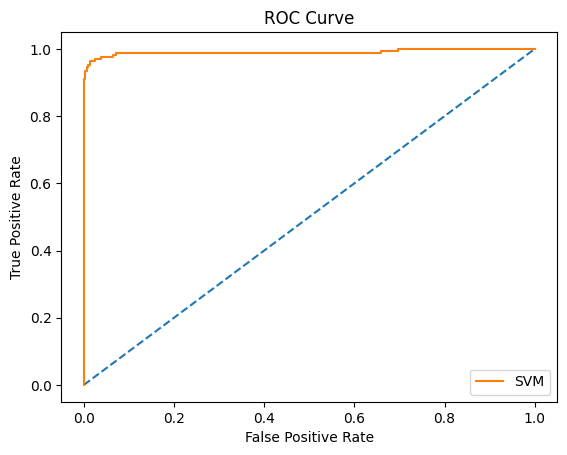

Accuracy:  0.9714285714285714
Precision:  0.9871794871794872
Recall:  0.9333333333333333
F1:  0.9595015576323987
AUC:  0.9632183908045977
Test Results: 
Confusion Matrix: 
[[66  1]
 [ 3 44]]


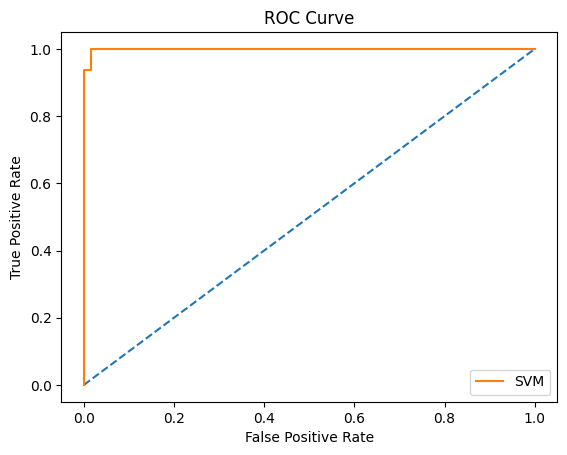

Accuracy:  0.9649122807017544
Precision:  0.9777777777777777
Recall:  0.9361702127659575
F1:  0.9565217391304347
AUC:  0.9606224198158145
-----------------------
Iteration:  2
Best Parameters:  {'estimator__C': 5.7}
Train Results: 
Accuracy:  0.9648351648351648
Precision:  0.963855421686747
Recall:  0.9411764705882353
F1:  0.9523809523809523
AUC:  0.9600619195046439
Test Results: 
Accuracy:  0.9824561403508771
Precision:  1.0
Recall:  0.9523809523809523
F1:  0.975609756097561
AUC:  0.9761904761904762
-----------------------
Iteration:  3
Best Parameters:  {'estimator__C': 3.6}
Train Results: 
Accuracy:  0.9824175824175824
Precision:  0.9937888198757764
Recall:  0.9580838323353293
F1:  0.9756097560975608
AUC:  0.9773058050565536
Test Results: 
Accuracy:  0.9649122807017544
Precision:  0.9767441860465116
Recall:  0.9333333333333333
F1:  0.9545454545454545
AUC:  0.9594202898550726
-----------------------
Iteration:  4
Best Parameters:  {'estimator__C': 2.1}
Train Results: 
Accuracy:  0.98

In [15]:
semi_supervised_results = monte_carlo(30, data_X, data_y, learning="semi_supervised")

In [16]:
print("Semi-Supervised Learning Train Results: ")
semisupervised_train_results = []
for result in semi_supervised_results:
    semisupervised_train_results.append(result["train"])
semisupervised_train_results = pd.DataFrame(semisupervised_train_results)
print("Mean Accuracy: ", semisupervised_train_results["accuracy"].mean())
print("Mean Precision: ", semisupervised_train_results["precision"].mean())
print("Mean Recall: ", semisupervised_train_results["recall"].mean())
print("Mean F1: ", semisupervised_train_results["f1"].mean())
print("Mean AUC: ", semisupervised_train_results["auc"].mean())

Semi-Supervised Learning Train Results: 
Mean Accuracy:  0.9755311355311356
Mean Precision:  0.9880841536908754
Mean Recall:  0.9459991205817481
Mean F1:  0.9664473209863409
Mean AUC:  0.9695478685247713


In [17]:
print("Semi-Supervised Learning Test Results: ")
semisupervised_test_results = []
for result in semi_supervised_results:
    semisupervised_test_results.append(result["test"])
semisupervised_test_results = pd.DataFrame(semisupervised_test_results)
print("Mean Accuracy: ", semisupervised_test_results["accuracy"].mean())
print("Mean Precision: ", semisupervised_test_results["precision"].mean())
print("Mean Recall: ", semisupervised_test_results["recall"].mean())
print("Mean F1: ", semisupervised_test_results["f1"].mean())
print("Mean AUC: ", semisupervised_test_results["auc"].mean())

Semi-Supervised Learning Test Results: 
Mean Accuracy:  0.9666666666666665
Mean Precision:  0.9806288446333824
Mean Recall:  0.9277374062672208
Mean F1:  0.9527674762362877
Mean AUC:  0.9587072643592637


#### iii. Unsupervised Learning

One way to prevent algorithm from not being trapped in local minima is to run the algorithm multiple times and find the best out of the results, as there is no way to know if the minima we obtained is local or a global minima. Kmeans algorithm does this using n_init parameter which starts from multiple starting cluster points (default 10), and doing this multiple times using random_state and using random train_test_split ensures that we do not get stuck on a local minima.

In [18]:
def unsupervised_results(y_pred, y_distances, y, reversed, m):
    results = {}
    y_prob = softmax(y_distances, axis=1)[:, 0]
    if reversed:
        y_pred = y_pred ^ 1
        y_prob = 1 - y_prob
    results["accuracy"] = accuracy_score(y, y_pred)
    results["precision"], results["recall"], results["f1"], _ = precision_recall_fscore_support(y, y_pred, average='binary')
    results["auc"] = roc_auc_score(y, y_prob)

    if m == 0:
        cf_matrix = confusion_matrix(y, y_pred)
        print("Confusion Matrix: ")
        print(cf_matrix)

        fpr, tpr, _ = roc_curve(y, y_prob)

        ns_pred = [0 for _ in range(len(y))]
        ns_fpr, ns_tpr, _ = roc_curve(y, ns_pred)

        plt.plot(ns_fpr, ns_tpr, linestyle="--")
        plt.plot(fpr, tpr, label="Unsupervised SVM")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve Test")
        plt.legend()
        plt.show()
    
    print("Accuracy: ", results["accuracy"])
    print("Precision: ", results["precision"])
    print("Recall: ", results["recall"])
    print("F1: ", results["f1"])
    print("AUC: ", results["auc"])

    return results

In [19]:
def unsupervised(data_X, data_y, m):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=m)

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_train)

    X_train = pd.DataFrame(scaled_data, columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    kmeans = KMeans(n_clusters=2, n_init=20, random_state=m)
    kmeans.fit(X_train)
    cluster_centers = kmeans.cluster_centers_
    reversed = False
    for i, center in enumerate(cluster_centers):
        closest_points_indices = np.argsort(pairwise_distances(center.reshape(1, -1), X_train))[0][:30]
        y_closest = y_train.iloc[closest_points_indices]
        unique, counts = np.unique(y_closest, return_counts=True)
        if (i != unique[np.argmax(counts)]):
            reversed = True

    y_train_pred = kmeans.predict(X_train)
    y_train_distances = kmeans.transform(X_train)
    
    y_test_pred = kmeans.predict(X_test)
    y_test_distances = kmeans.transform(X_test)

    results = {}
    results["train"] = unsupervised_results(y_train_pred, y_train_distances, y_train, reversed, m)
    results["test"] = unsupervised_results(y_test_pred, y_test_distances, y_test, reversed, m)

    return results

Iteration:  1
Confusion Matrix: 
[[281   9]
 [ 34 131]]


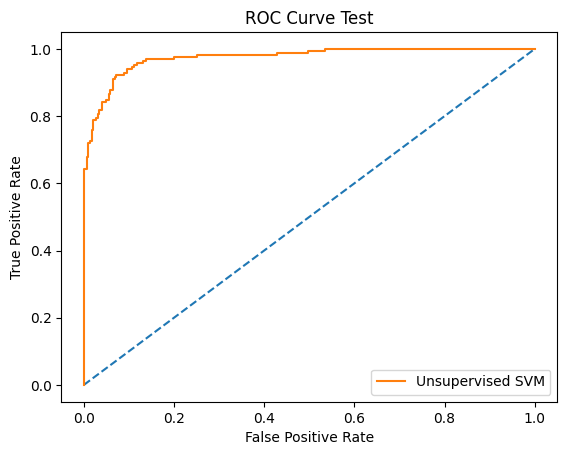

Accuracy:  0.9054945054945055
Precision:  0.9357142857142857
Recall:  0.793939393939394
F1:  0.859016393442623
AUC:  0.9743155694879833
Confusion Matrix: 
[[64  3]
 [ 5 42]]


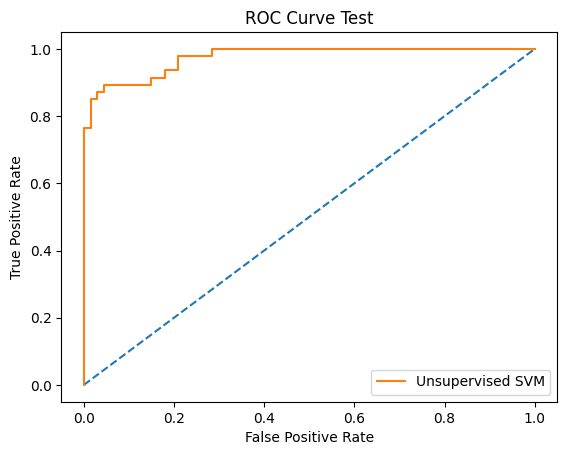

Accuracy:  0.9298245614035088
Precision:  0.9333333333333333
Recall:  0.8936170212765957
F1:  0.9130434782608695
AUC:  0.9752302318196253
-----------------------
Iteration:  2
Accuracy:  0.9318681318681319
Precision:  0.9664429530201343
Recall:  0.8470588235294118
F1:  0.9028213166144201
AUC:  0.9814035087719299
Accuracy:  0.8771929824561403
Precision:  0.9117647058823529
Recall:  0.7380952380952381
F1:  0.8157894736842106
AUC:  0.9626322751322751
-----------------------
Iteration:  3
Accuracy:  0.9032967032967033
Precision:  0.9019607843137255
Recall:  0.8263473053892215
F1:  0.8624999999999999
AUC:  0.9722014304723886
Accuracy:  0.9122807017543859
Precision:  0.926829268292683
Recall:  0.8444444444444444
F1:  0.8837209302325582
AUC:  0.9655394524959743
-----------------------
Iteration:  4
Accuracy:  0.9120879120879121
Precision:  0.9583333333333334
Recall:  0.8023255813953488
F1:  0.8734177215189873
AUC:  0.9757375297888076
Accuracy:  0.9122807017543859
Precision:  0.96875
Recall:  

In [20]:
unsupervised_results = monte_carlo(30, data_X, data_y, learning="unsupervised")

In [21]:
print("Unsupervised Learning Train Results: ")
unsupervised_train_results = []
for result in unsupervised_results:
    unsupervised_train_results.append(result["train"])
unsupervised_train_results = pd.DataFrame(unsupervised_train_results)
print("Mean Accuracy: ", unsupervised_train_results["accuracy"].mean())
print("Mean Precision: ", unsupervised_train_results["precision"].mean())
print("Mean Recall: ", unsupervised_train_results["recall"].mean())
print("Mean F1: ", unsupervised_train_results["f1"].mean())
print("Mean AUC: ", unsupervised_train_results["auc"].mean())

Unsupervised Learning Train Results: 
Mean Accuracy:  0.9102564102564104
Mean Precision:  0.9277820080750805
Mean Recall:  0.824546741250445
Mean F1:  0.8727713142060182
Mean AUC:  0.9747727125011765


In [22]:
print("Unsupervised Learning Test Results: ")
unsupervised_test_results = []
for result in unsupervised_results:
    unsupervised_test_results.append(result["test"])
unsupervised_test_results = pd.DataFrame(unsupervised_test_results)
print("Mean Accuracy: ", unsupervised_test_results["accuracy"].mean())
print("Mean Precision: ", unsupervised_test_results["precision"].mean())
print("Mean Recall: ", unsupervised_test_results["recall"].mean())
print("Mean F1: ", unsupervised_test_results["f1"].mean())
print("Mean AUC: ", unsupervised_test_results["auc"].mean())

Unsupervised Learning Test Results: 
Mean Accuracy:  0.9128654970760236
Mean Precision:  0.9258170149210228
Mean Recall:  0.8322579951422229
Mean F1:  0.8750522770472924
Mean AUC:  0.9750301174564466


#### iv. Spectral Clustering

In [23]:
def random_majority_poll(y, y_pred):
    cluster_labels = np.unique(y_pred)
    y_pred_modified = np.copy(y_pred)

    for label in cluster_labels:
        cluster_indices = np.where(y_pred == label)[0]
        # random_indices = np.random.choice(cluster_indices, 30, replace=False)
        cluster_y = y.iloc[cluster_indices]
        # threshold_count = int(len(cluster_indices) * threshold)

        # if np.sum(cluster_y) >= threshold_count:
        #     majority_label = 1
        # else:
        #     majority_label = 0
        majority_label = np.argmax(np.bincount(cluster_y))
        y_pred_modified[cluster_indices] = majority_label
    
    # if majority_labels[0] != cluster_labels[0]:
    #     y_pred = y_pred ^ 1
    
    return y_pred_modified

In [24]:
def spectral_results(y, y_pred, m):
    results = {}
    results["accuracy"] = accuracy_score(y, y_pred)
    results["precision"], results["recall"], results["f1"], _ = precision_recall_fscore_support(y, y_pred, average='binary')
    results["auc"] = roc_auc_score(y, y_pred)

    if m == 0:
        cf_matrix = confusion_matrix(y, y_pred)
        print("Confusion Matrix: ")
        print(cf_matrix)

        fpr, tpr, _ = roc_curve(y, y_pred)

        ns_pred = [0 for _ in range(len(y))]
        ns_fpr, ns_tpr, _ = roc_curve(y, ns_pred)

        plt.plot(ns_fpr, ns_tpr, linestyle="--")
        plt.plot(fpr, tpr, label="Spectral Clustering SVM")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve Test")
        plt.legend()
        plt.show()
        
    print("Accuracy: ", results["accuracy"])
    print("Precision: ", results["precision"])
    print("Recall: ", results["recall"])
    print("F1: ", results["f1"])
    print("AUC: ", results["auc"])

    return results

In [25]:
def spectral(data_X, data_y, m):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=m)

    scaler = Normalizer()
    scaled_data = scaler.fit_transform(X_train)

    X_train = pd.DataFrame(scaled_data, columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
    spectral_clustering = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, assign_labels='kmeans', eigen_tol=1e-2, eigen_solver='arpack', random_state=m)
    
    results = {}

    y_train_pred = spectral_clustering.fit_predict(X_train)
    y_train_pred = random_majority_poll(y_train, y_train_pred)
    results["train"] = spectral_results(y_train, y_train_pred, m)

    y_test_pred = spectral_clustering.fit_predict(X_test)
    # y_test_pred_array = []
    # thresholds = np.linspace(0.0, 1.0, 11)
    # for threshold in thresholds:
    #     y_test_pred_array.append(random_majority_poll(y_test, y_test_pred, threshold))
    # curve(y_test_pred_array, y_test, thresholds)
    y_test_pred = random_majority_poll(y_test, y_test_pred)
    results["test"] = spectral_results(y_test, y_test_pred, m)

    return results

In [26]:
# def curve(y_pred_array, y, thresholds):
#     plt.figure(figsize=(8, 6))
#     plt.plot([0, 1], [0, 1], 'k--')

#     for i, y_pred in enumerate(y_pred_array):
#         tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
#         tpr = tp / (tp + fn)
#         fpr = fp / (fp + tn)
#         # roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr,  'ro', label='Threshold = %0.2f' % thresholds[i])

#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend(loc="lower right")
#     plt.show()

# Example usage:
# plot_roc_curve(y_pred_array, y, thresholds)


Iteration:  1
Confusion Matrix: 
[[284   6]
 [ 45 120]]


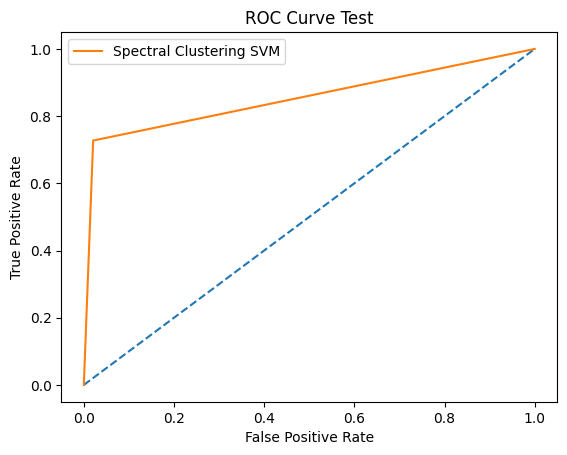

Accuracy:  0.8879120879120879
Precision:  0.9523809523809523
Recall:  0.7272727272727273
F1:  0.8247422680412371
AUC:  0.8532915360501567
Confusion Matrix: 
[[65  2]
 [12 35]]


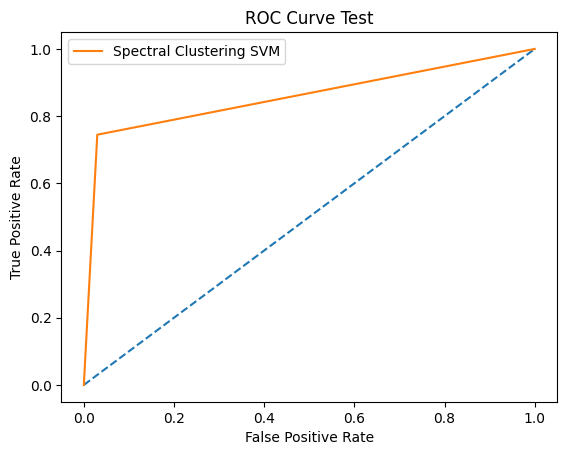

Accuracy:  0.8771929824561403
Precision:  0.9459459459459459
Recall:  0.7446808510638298
F1:  0.8333333333333334
AUC:  0.8574150523975866
-----------------------
Iteration:  2
Accuracy:  0.8901098901098901
Precision:  0.96875
Recall:  0.7294117647058823
F1:  0.832214765100671
AUC:  0.8576883384932921
Accuracy:  0.9122807017543859
Precision:  0.9210526315789473
Recall:  0.8333333333333334
F1:  0.875
AUC:  0.8958333333333335
-----------------------
Iteration:  3
Accuracy:  0.8835164835164835
Precision:  0.975
Recall:  0.7005988023952096
F1:  0.8153310104529616
AUC:  0.8450910678642716
Accuracy:  0.8859649122807017
Precision:  0.9444444444444444
Recall:  0.7555555555555555
F1:  0.8395061728395062
AUC:  0.8632850241545893
-----------------------
Iteration:  4
Accuracy:  0.8769230769230769
Precision:  0.953125
Recall:  0.7093023255813954
F1:  0.8133333333333335
AUC:  0.8440504560769168
Accuracy:  0.9035087719298246
Precision:  0.8918918918918919
Recall:  0.825
F1:  0.8571428571428571
AUC:  

In [27]:
spectral_results = monte_carlo(30, data_X, data_y, learning="spectral")

In [28]:
print("Spectral Learning Train Results: ")
spectral_train_results = []
for result in spectral_results:
    spectral_train_results.append(result["train"])
spectral_train_results = pd.DataFrame(spectral_train_results)
print("Mean Accuracy: ", spectral_train_results["accuracy"].mean())
print("Mean Precision: ", spectral_train_results["precision"].mean())
print("Mean Recall: ", spectral_train_results["recall"].mean())
print("Mean F1: ", spectral_train_results["f1"].mean())
print("Mean AUC: ", spectral_train_results["auc"].mean())

Spectral Learning Train Results: 
Mean Accuracy:  0.8830769230769231
Mean Precision:  0.9604002887285732
Mean Recall:  0.716399693066028
Mean F1:  0.8205038040780577
Mean AUC:  0.8493718505197079


In [29]:
print("Spectral Learning Test Results: ")
spectral_test_results = []
for result in spectral_results:
    spectral_test_results.append(result["test"])
spectral_test_results = pd.DataFrame(spectral_test_results)
print("Mean Accuracy: ", spectral_test_results["accuracy"].mean())
print("Mean Precision: ", spectral_test_results["precision"].mean())
print("Mean Recall: ", spectral_test_results["recall"].mean())
print("Mean F1: ", spectral_test_results["f1"].mean())
print("Mean AUC: ", spectral_test_results["auc"].mean())

Spectral Learning Test Results: 
Mean Accuracy:  0.8845029239766082
Mean Precision:  0.9457302298508361
Mean Recall:  0.7325682343947607
Mean F1:  0.821919659980217
Mean AUC:  0.8529402984686596


### v.

In [30]:
learning_stats = [
    ["Supervised Train", supervised_train_results["accuracy"].mean(), supervised_train_results["precision"].mean(), supervised_train_results["recall"].mean(), supervised_train_results["f1"].mean(), supervised_train_results["auc"].mean()],
    ["Supervised Test", supervised_test_results["accuracy"].mean(), supervised_test_results["precision"].mean(), supervised_test_results["recall"].mean(), supervised_test_results["f1"].mean(), supervised_test_results["auc"].mean()],
    ["Semi-Supervised Train", semisupervised_train_results["accuracy"].mean(), semisupervised_train_results["precision"].mean(), semisupervised_train_results["recall"].mean(), semisupervised_train_results["f1"].mean(), semisupervised_train_results["auc"].mean()],
    ["Semi-Supervised Test", semisupervised_test_results["accuracy"].mean(), semisupervised_test_results["precision"].mean(), semisupervised_test_results["recall"].mean(), semisupervised_test_results["f1"].mean(), semisupervised_test_results["auc"].mean()],
    ["Unsupervised Train", unsupervised_train_results["accuracy"].mean(), unsupervised_train_results["precision"].mean(), unsupervised_train_results["recall"].mean(), unsupervised_train_results["f1"].mean(), unsupervised_train_results["auc"].mean()],
    ["Unsupervised Test", unsupervised_test_results["accuracy"].mean(), unsupervised_test_results["precision"].mean(), unsupervised_test_results["recall"].mean(), unsupervised_test_results["f1"].mean(), unsupervised_test_results["auc"].mean()],
    ["Spectral Train", spectral_train_results["accuracy"].mean(), spectral_train_results["precision"].mean(), spectral_train_results["recall"].mean(), spectral_train_results["f1"].mean(), spectral_train_results["auc"].mean()],
    ["Spectral Test", spectral_test_results["accuracy"].mean(), spectral_test_results["precision"].mean(), spectral_test_results["recall"].mean(), spectral_test_results["f1"].mean(), spectral_test_results["auc"].mean()],
]
print(tabulate(learning_stats, headers=["Learning/Metric", "Accuracy", "Precision", "Recall", "F1", "AUC"], tablefmt="simple"))

Learning/Metric          Accuracy    Precision    Recall        F1       AUC
---------------------  ----------  -----------  --------  --------  --------
Supervised Train         0.984835     0.989992  0.969124  0.979399  0.981641
Supervised Test          0.966959     0.971043  0.938399  0.953785  0.961298
Semi-Supervised Train    0.975531     0.988084  0.945999  0.966447  0.969548
Semi-Supervised Test     0.966667     0.980629  0.927737  0.952767  0.958707
Unsupervised Train       0.910256     0.927782  0.824547  0.872771  0.974773
Unsupervised Test        0.912865     0.925817  0.832258  0.875052  0.97503
Spectral Train           0.883077     0.9604    0.7164    0.820504  0.849372
Spectral Test            0.884503     0.94573   0.732568  0.82192   0.85294


We would assume that supervised performs better than semi-supervised. However the test results of semi-supervised perform just slightly worse than the supervised ones. Infact semi-supervised has a higher precision than supervised precision.

Also, we would assume unsupervised performs worse than all other models. However, Test AUC score is better than both supervised and semi-supervised models, which means unsupervised learning explains the randomness better than the other two.

Spectral Clustering performs the worst, indicating the data is easily seperable in the given dimensions and does not need radial dimensions to explain the data.